# Curve fitting application: Boyer et al. (2011) for rheology of dense suspension

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

In this notebook, we will demonstrate how to use nonlinear curve fitting to reproduce the Garcia and Parker (1991) suspended sediment entrainment law. It is not essential that you are familiar with sediment transport theroies. It is sufficent to know that the murky rivers you see in nature have sediment in suspension. These sediment particles are transported by turbulent river flows. One key process during the transport is that the sediment in  river bed can be **entrained** into water column by turbulence. Think of blowing air over a desk covered with dust. The air flow will pick up the dust particles and make them suspend in air. The harder you blow, the more dust particle will be picked up, a.k.a., the higher the entrainment rate. The rate of entrainment is often quantified by suspended sediment entrainment laws. Garcia and Parker (1991) proposed one of these laws and brought the authors great glory. 

> M. H., Garcia and G. Parker (1991). Entrainment of bed sediment into suspension. Journal of Hydraulic Engineering, 117(4):414-435

Garcia and Parker (1991) proposed the following entrainment law, which was derived from curve fitting:
\begin{equation}
  E=\frac{AZ_u^5}{1+\frac{A}{0.3}Z_u^5}
\end{equation}
where $E$ is the entrainment rate, $Z_u$ is variable which combines the properties of the turbulence and sediment particles. It is suffice to note that when the turbulence level goes up and sediment particle size getting smaller, the value of $Z_u$ increases. As a result, the entrainment rate $E$ also increases. 

This equation is nonlinear and we can use nonlinear curve fitting methods. We will use the "curve_fit" function in [SciPy (Scientific Python)](https://www.scipy.org)'s optimize library, which uses non-linear least squares to fit a function for a give set of data.

The data points were digitized from Figure 5 in Garcia and Parker (1991) and provided in the text data file "GarciaParker1991.dat".

Note: the following code gives $A$ = 8.88975831e-08, while Garcia and Parker (1991) gives $A$ = 1.3e-07. The difference is due to the inaccuracy in the digitized data on a log-log paper. 

r_squared =  0.9896968935967668


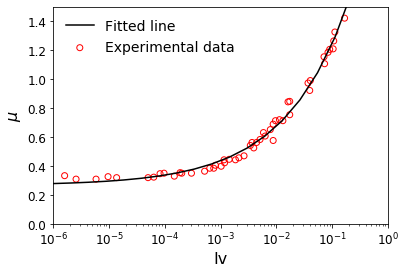

In [24]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def rheology_fit(x, a1, a2, a3):
    return a1*np.exp(a2*x)+a3

# load the measurement data in Numpy array format
Iv, mu = np.loadtxt('figure_data.csv', delimiter=',', unpack=True, skiprows=1)

x = np.log10(Iv)

fitting_parameters, covariance = curve_fit(rheology_fit, x, mu)
a1, a2, a3 = fitting_parameters

#get the residual
residuals = mu- rheology_fit(np.log10(Iv),a1,a2,a3)
#get the sum of residual squared
ss_res = np.sum(residuals**2)
#get the total sum of squares (ss_tot) with
ss_tot = np.sum((mu-np.mean(mu))**2)
#finally, the r_squared-value
r_squared = 1 - (ss_res / ss_tot)

print("r_squared = ", r_squared)

# predicted value using the fitting curve
x_pred = np.linspace(-6, 0, num=20)
Iv_pred = 10**x_pred
y_pred = a1*np.exp(a2*x_pred)+a3

# plotting the original data points
plt.scatter(Iv, mu, c = "none", edgecolors = "r", marker = "o", label='Experimental data') 

# plotting the regression line 
plt.plot(Iv_pred, y_pred, color = "k", label='Fitted line') 

plt.xlabel('Iv',fontsize=16) 
plt.ylabel('$\mu$',fontsize=16) 

plt.xscale('log')

plt.xlim([1e-6, 1])
plt.ylim([0, 1.5])

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=14,frameon=False)

plt.show() 

r_squared =  0.9934334234057703


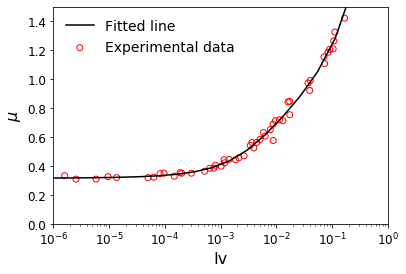

In [22]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def rheology_fit(Iv, mu1, mu2, I0):
    return mu1+(mu2-mu1)/(1.0+I0/Iv)+Iv+5.0/2.0*0.585*Iv**0.5

# load the measurement data in Numpy array format
Iv, mu = np.loadtxt('figure_data.csv', delimiter=',', unpack=True, skiprows=1)

fitting_parameters, covariance = curve_fit(rheology_fit, Iv, mu)
mu1,mu2,I0 = fitting_parameters

#get the residual
residuals = mu- rheology_fit(Iv, mu1,mu2,I0)
#get the sum of residual squared
ss_res = np.sum(residuals**2)
#get the total sum of squares (ss_tot) with
ss_tot = np.sum((mu-np.mean(mu))**2)
#finally, the r_squared-value
r_squared = 1 - (ss_res / ss_tot)

print("r_squared = ", r_squared)

# predicted value using the fitting curve
x_pred = np.linspace(-6, 0, num=20)
Iv_pred = 10**x_pred
mu_pred = mu1+(mu2-mu1)/(1.0+I0/Iv_pred)+Iv_pred+5.0/2.0*0.585*Iv_pred**0.5

# plotting the original data points
plt.scatter(Iv, mu, c = "none", edgecolors = "r", marker = "o", label='Experimental data') 

# plotting the regression line 
plt.plot(Iv_pred, mu_pred, color = "k", label='Fitted line') 

plt.xlabel('Iv',fontsize=16) 
plt.ylabel('$\mu$',fontsize=16) 

plt.xscale('log')

plt.xlim([1e-6, 1])
plt.ylim([0, 1.5])

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=14,frameon=False)

plt.show() 